In [1]:
from future import print_function, division
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles


In [20]:
#We'll use a synthetic dataset for ease of visualization
print("Creating Dataset...")

# Make a large circle containing a smaller circle in 2d.
# X : array of shape [n_samples, 2]
# y : array of shape [n_samples]
X, y = make_circles(n_samples=1000, noise=0.2, factor=0.5)
X = StandardScaler().fit_transform(X)

Creating Dataset...


In [11]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

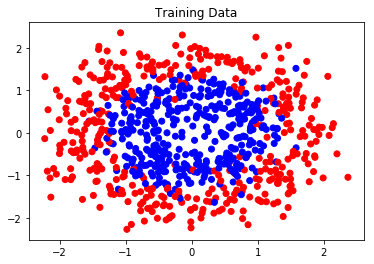

In [12]:
#Start by plotting training data
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.title("Training Data")
plt.show()

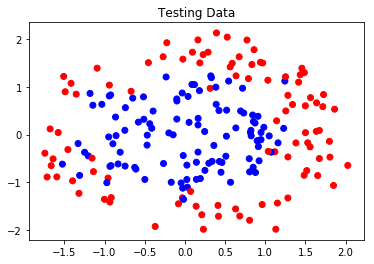

In [13]:
#plotting test data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright)
plt.title("Testing Data")
plt.show()

In [14]:
#Now Create Classifier
print("Creating Neural Network Classifier...")
clf = MLPClassifier(hidden_layer_sizes=(20,10), alpha=1e-3, learning_rate_init=1e-3, 
                    max_iter=5000, shuffle=True, warm_start=True)

Creating Neural Network Classifier...


In [15]:
print("Fitting Neural Network classifier...")
clf.fit(X_train, y_train)

Fitting Neural Network classifier...


MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=True)

In [16]:
training_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
print("Training accuracy: {}, Test Accuracy: {}".format(training_accuracy, test_accuracy))

Training accuracy: 0.91375, Test Accuracy: 0.92


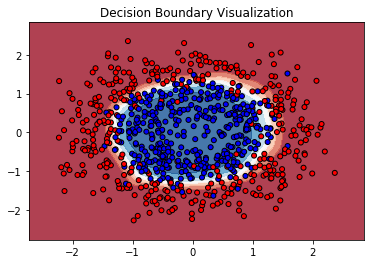

In [18]:
#Visualize Decision Boundary on the training set
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='black', s=25)

plt.title("Decision Boundary Visualization")
plt.show()

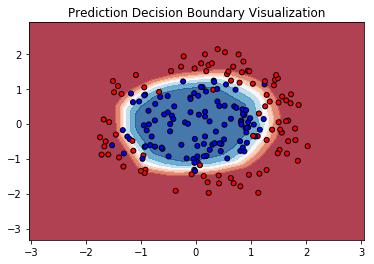

In [25]:
# Visualize Decision Boundary on the test set 
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='black', s=25)
plt.title("Prediction Decision Boundary Visualization")
plt.show()

Creating Logistic Classifier...
Training accuracy: 0.475, Test Accuracy: 0.375


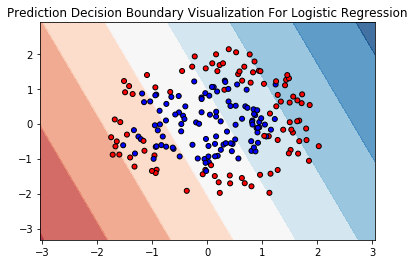

In [27]:
# Logistic Classifier underfits the dataset
from sklearn.linear_model import LogisticRegression

print("Creating Logistic Classifier...")
clf_logistic = LogisticRegression()
clf_logistic.fit(X_train, y_train)
training_accuracy = clf_logistic.score(X_train, y_train)
test_accuracy = clf_logistic.score(X_test, y_test)
print("Training accuracy: {}, Test Accuracy: {}".format(training_accuracy, test_accuracy))

# Visualize Decision Boundary on the test set 
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

Z = clf_logistic.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='black', s=25)
plt.title("Prediction Decision Boundary Visualization For Logistic Regression")
plt.show()